# Task 2 Prediction using Unsupervised ML
# Aurthor: Manali Dharmendra Bhoir

OBJECTIVE: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Introduction

The Iris dataset contains the data for 50 flowers from each of the 3 species - Setosa, Versicolor and Virginica. The data gives the measurements in centimeters of the variables sepal length and width and petal length and width for each of the flowers.

Aim of the study is to perform exploratory analysis on the data and build a K-means clustering model to cluster them into groups. 

# Libraries Required

In [1]:
library(ggplot2)
library(repr)
library(ggpubr)
library(cluster)

# Exploratory Data Analysis

The dataset has 150 observations which are equally distributed observations among the three species - Setosa, Versicolor and Verginica. First we import the data. The below table shows the summary statistics of all the 4 variables.

In [2]:
setwd("C:\\Users\\SAGAR BHOIR\\Desktop\\TSF Tasks")
iris=read.csv("iris.csv")
head(iris[,2:6])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
summary(iris[2:5])

 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

# Graphical Representation of the Iris Data

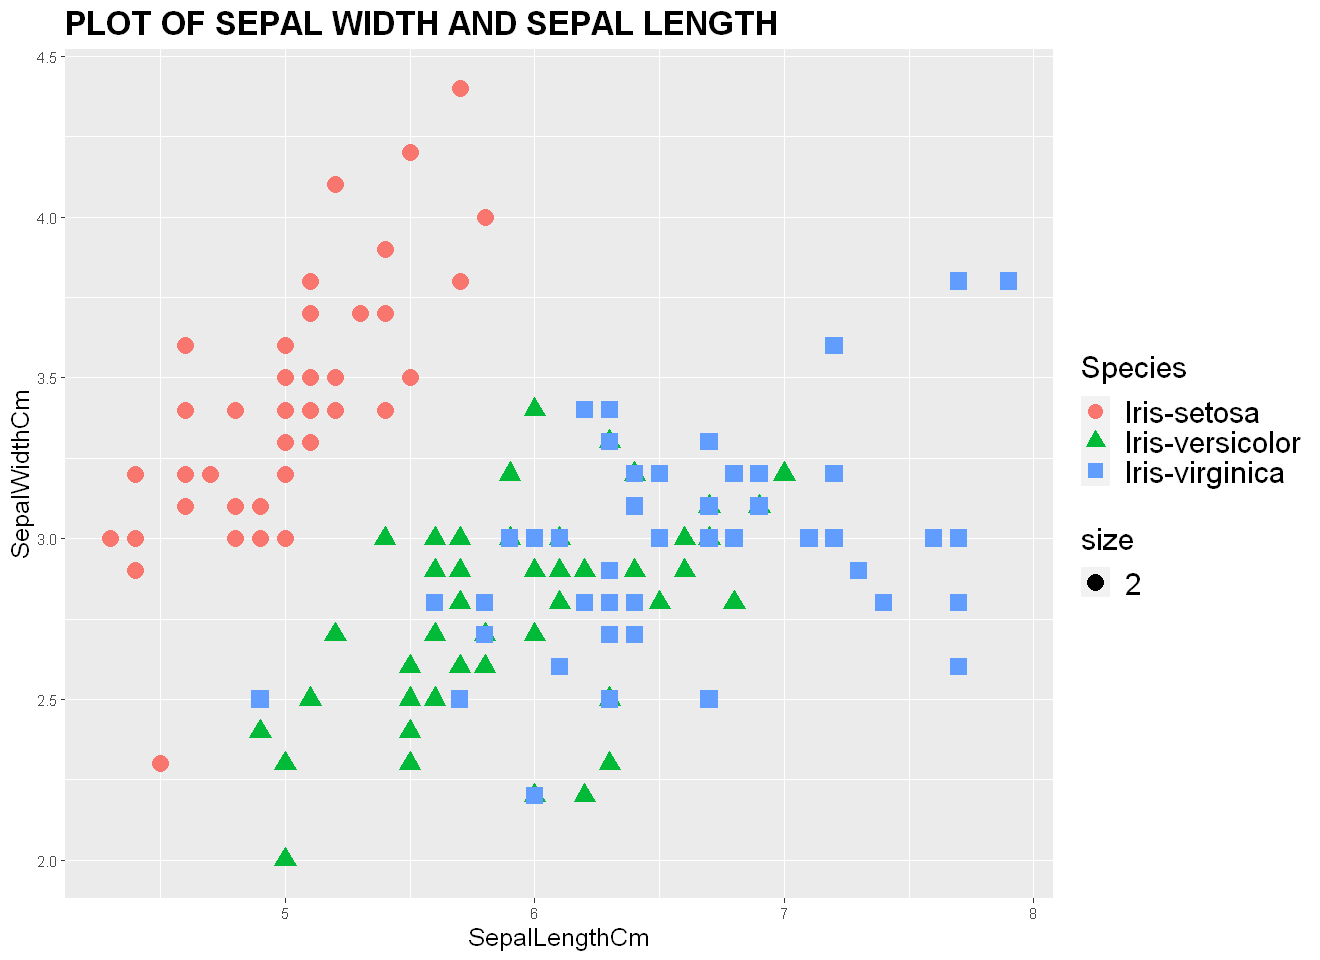

In [17]:
mytheme = theme(plot.title = element_text(face = "bold", size = 20),
                legend.text=element_text(size=18),
                legend.title=element_text(size=18),
                axis.title=element_text(size=15))


ggplot(iris,aes(x = SepalLengthCm, y = SepalWidthCm, col= Species)) +
            geom_point(aes(size = 2,shape=Species))+
            mytheme + ggtitle("PLOT OF SEPAL WIDTH AND SEPAL LENGTH")+
            guides(color = guide_legend(override.aes = list(size = 4)))

options(repr.plot.width = 10, repr.plot.height = 8)

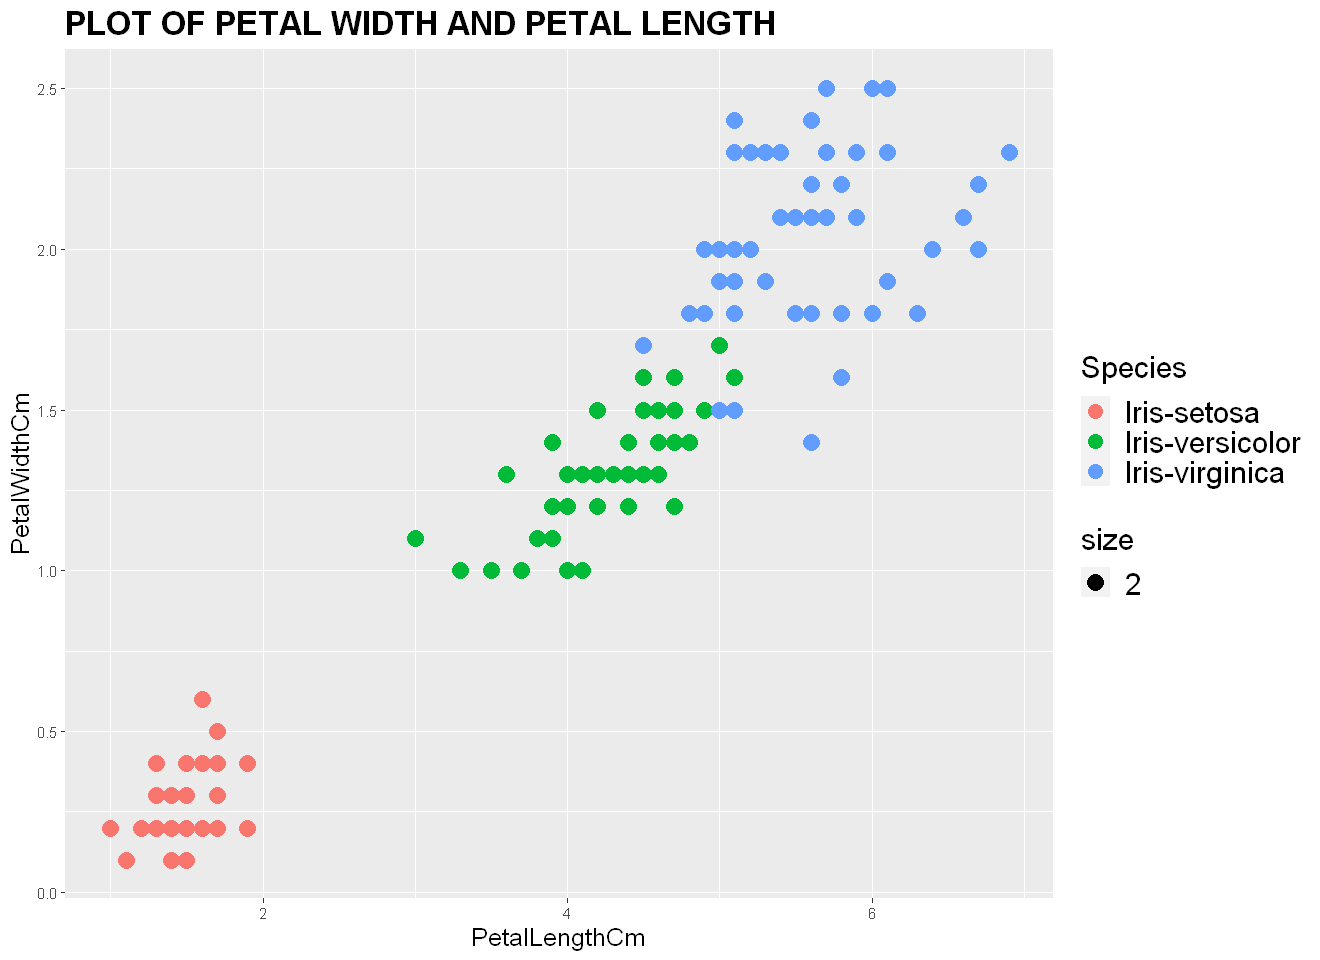

In [5]:
mytheme = theme(plot.title = element_text(face = "bold", size = 20),
                legend.text=element_text(size=18),
                legend.title=element_text(size=18),
                axis.title=element_text(size=15))

ggplot(iris,aes(x = PetalLengthCm, y = PetalWidthCm, col= Species)) + 
            geom_point(aes(size = 2))+
            mytheme + ggtitle("PLOT OF PETAL WIDTH AND PETAL LENGTH")+
            guides(color = guide_legend(override.aes = list(size = 4)))

options(repr.plot.width = 15, repr.plot.height =8 )

The petal length and petal width show 3 clusters.

# Boxplots

In [6]:
A=ggplot(iris[2:6])+
 geom_boxplot(aes(x = Species, y = SepalLengthCm, fill = Species))+
 theme_bw()

B=ggplot(iris[2:6])+
 geom_boxplot(aes(x = Species, y = SepalWidthCm, fill = Species))+
 theme_bw()

C=ggplot(iris[2:6])+
 geom_boxplot(aes(x = Species, y = PetalLengthCm, fill = Species))+
 theme_bw()

D=ggplot(iris[2:6])+
 geom_boxplot(aes(x = Species, y = PetalWidthCm, fill = Species))+
 theme_bw()

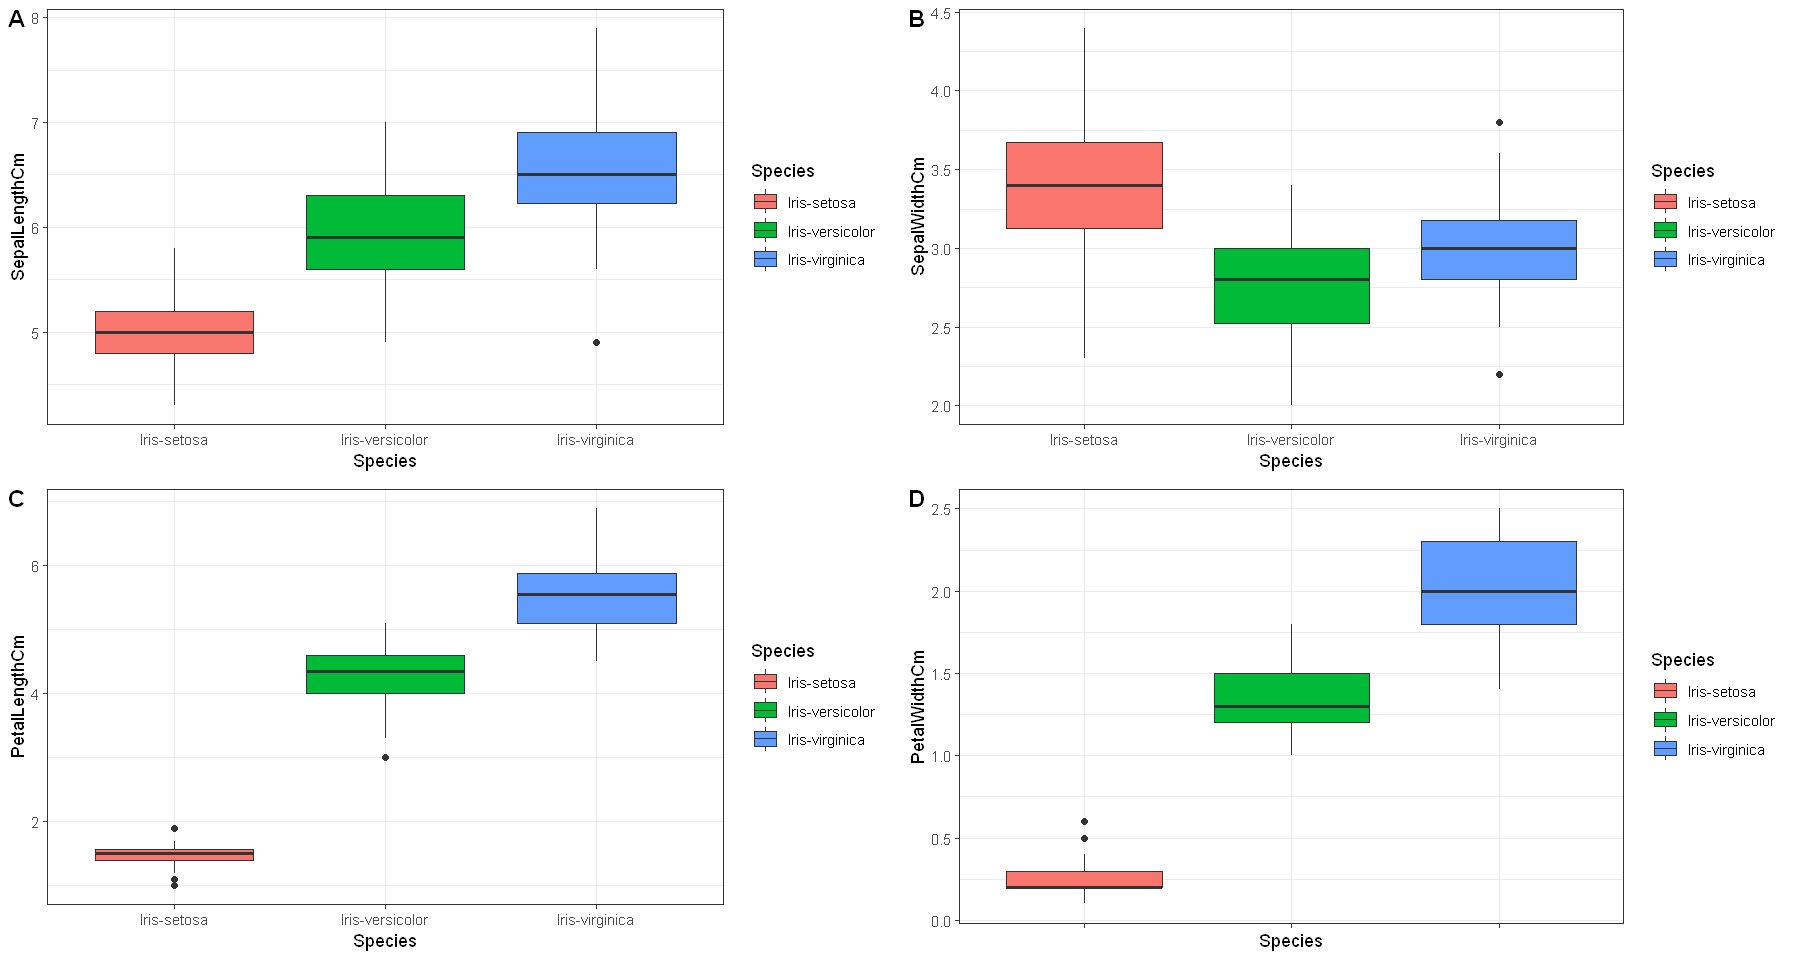

In [7]:
ggarrange(A, B,C,D + rremove("x.text"), 
          labels = c("A", "B", "C","D"),
          ncol = 2, nrow = 2)

# KMeans Clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster

We first Experiment with different number of clusters and draw a plot of total within cluster sum of squares with respect to the number of clusters to determine the optimal number of clusters

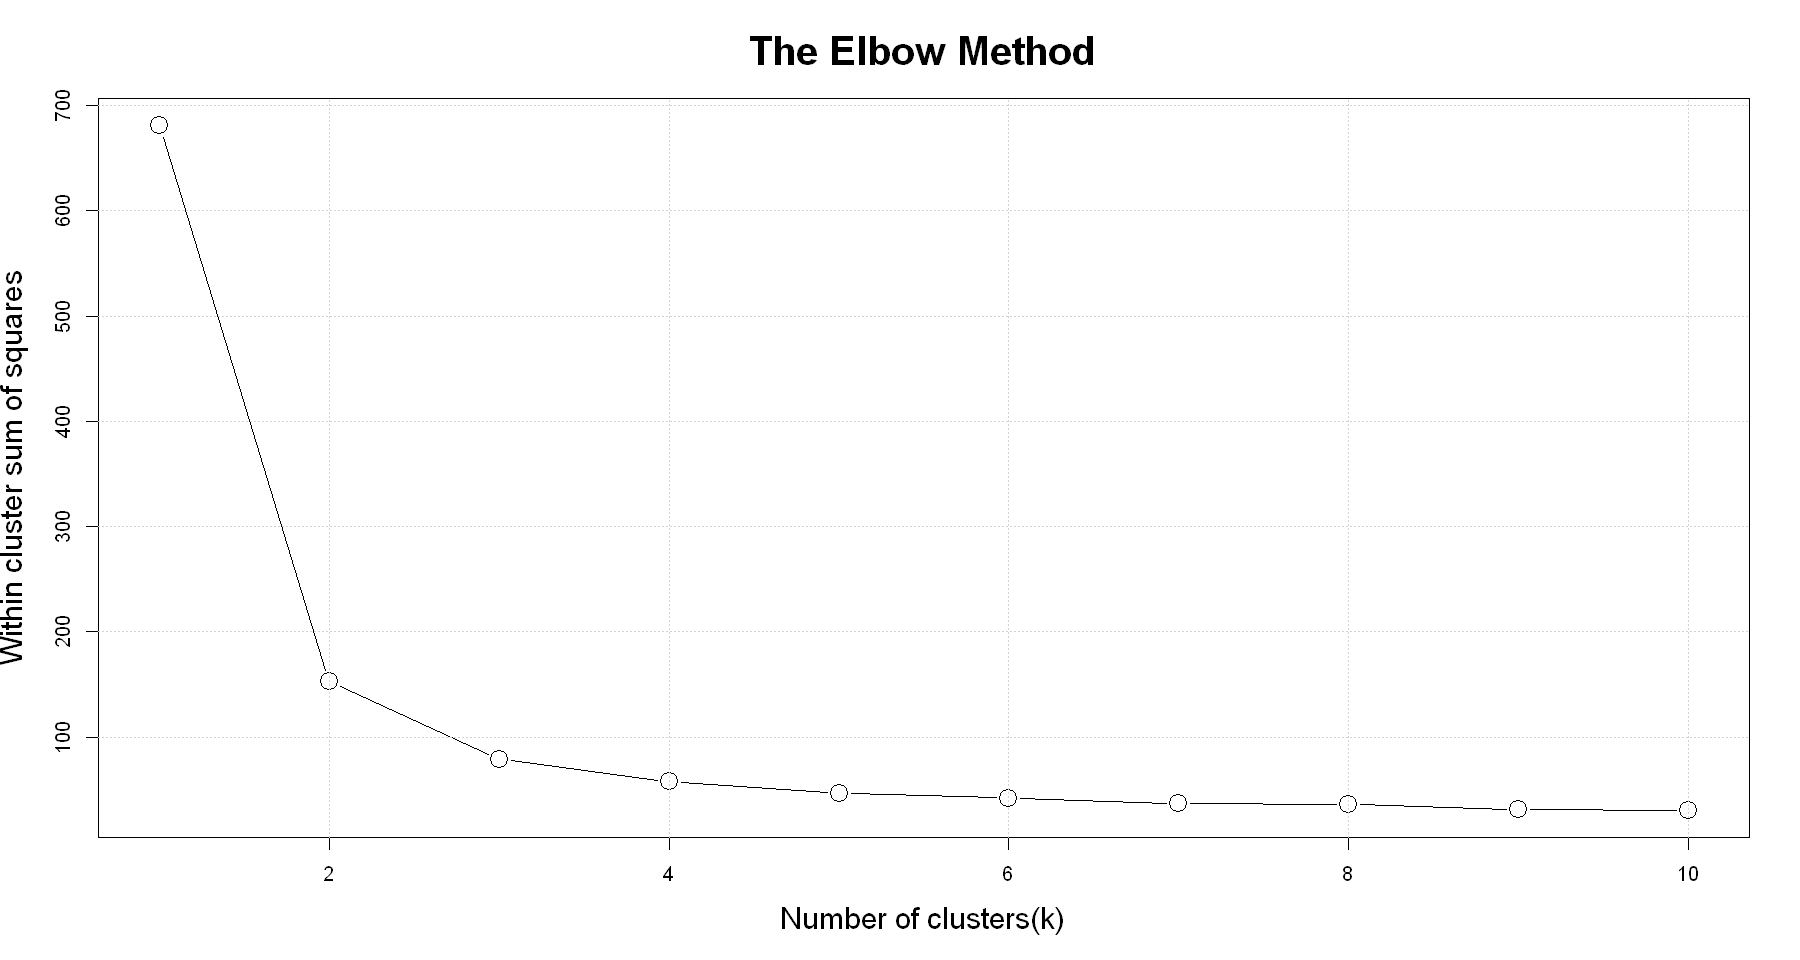

In [8]:
##Find the optimal number of clusters by Elbow Method
iris_cluster = iris[,2:5] 

clustvec=1:10
totwss=c()
for (i in 1:length(clustvec))
{
  KM=kmeans(iris_cluster,clustvec[i])
  totwss[i]=KM$tot.withinss
}
plot(clustvec,totwss,type="b",main="The Elbow Method", xlab = "Number of clusters(k)", 
    ylab = "Within cluster sum of squares",cex.main =2,cex.lab=1.5,cex=2)
grid()

The elbow point : k(centers) = 3. The plot of Within cluster sum of squares vs the number of clusters show us an elbow point at 3. 
So, we can conlude that 3 is the best value for k to be used to create the final model.

# The Final Cluster Model

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
set.seed(200)
KM = kmeans(iris_cluster,3,nstart = 20) 

iris_cluster$cluster = as.character(KM$cluster)


#The nstartvalue has also been defined as 20 which means that R will try 20 different
#random starting assignments and then select the one with the lowest within cluster variation.

DM1=dist(KM$centers);DM1             #The distance between the cluster centroids

         1        2
2 3.353886         
3 5.015894 1.797182

In [10]:
table(KM$cluster)


 1  2  3 
50 62 38 

The kmeans has grouped the data into three clusters- 1, 2 & 3 having 50, 62 & 38 observations respectively.

In [11]:
table(iris$Species,KM$cluster)  #How many species belong to each cluster

                 
                   1  2  3
  Iris-setosa     50  0  0
  Iris-versicolor  0 48  2
  Iris-virginica   0 14 36

Cluster 1 corresponds to Setosa, Cluster 2 corresponds to Versicolor and Cluster 3 to Virginica.
 
From the table we can see most of the observations have been clustered correctly however, 2 of the versicolor have been put in the cluster 3 with all the virginica and 14 of the verginica have been put in cluster 2 which mostly has versicolor.

In [18]:
KM$cluster ##CLUSTER MEMBERSHIP

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

# Visualize the kmeans clusters

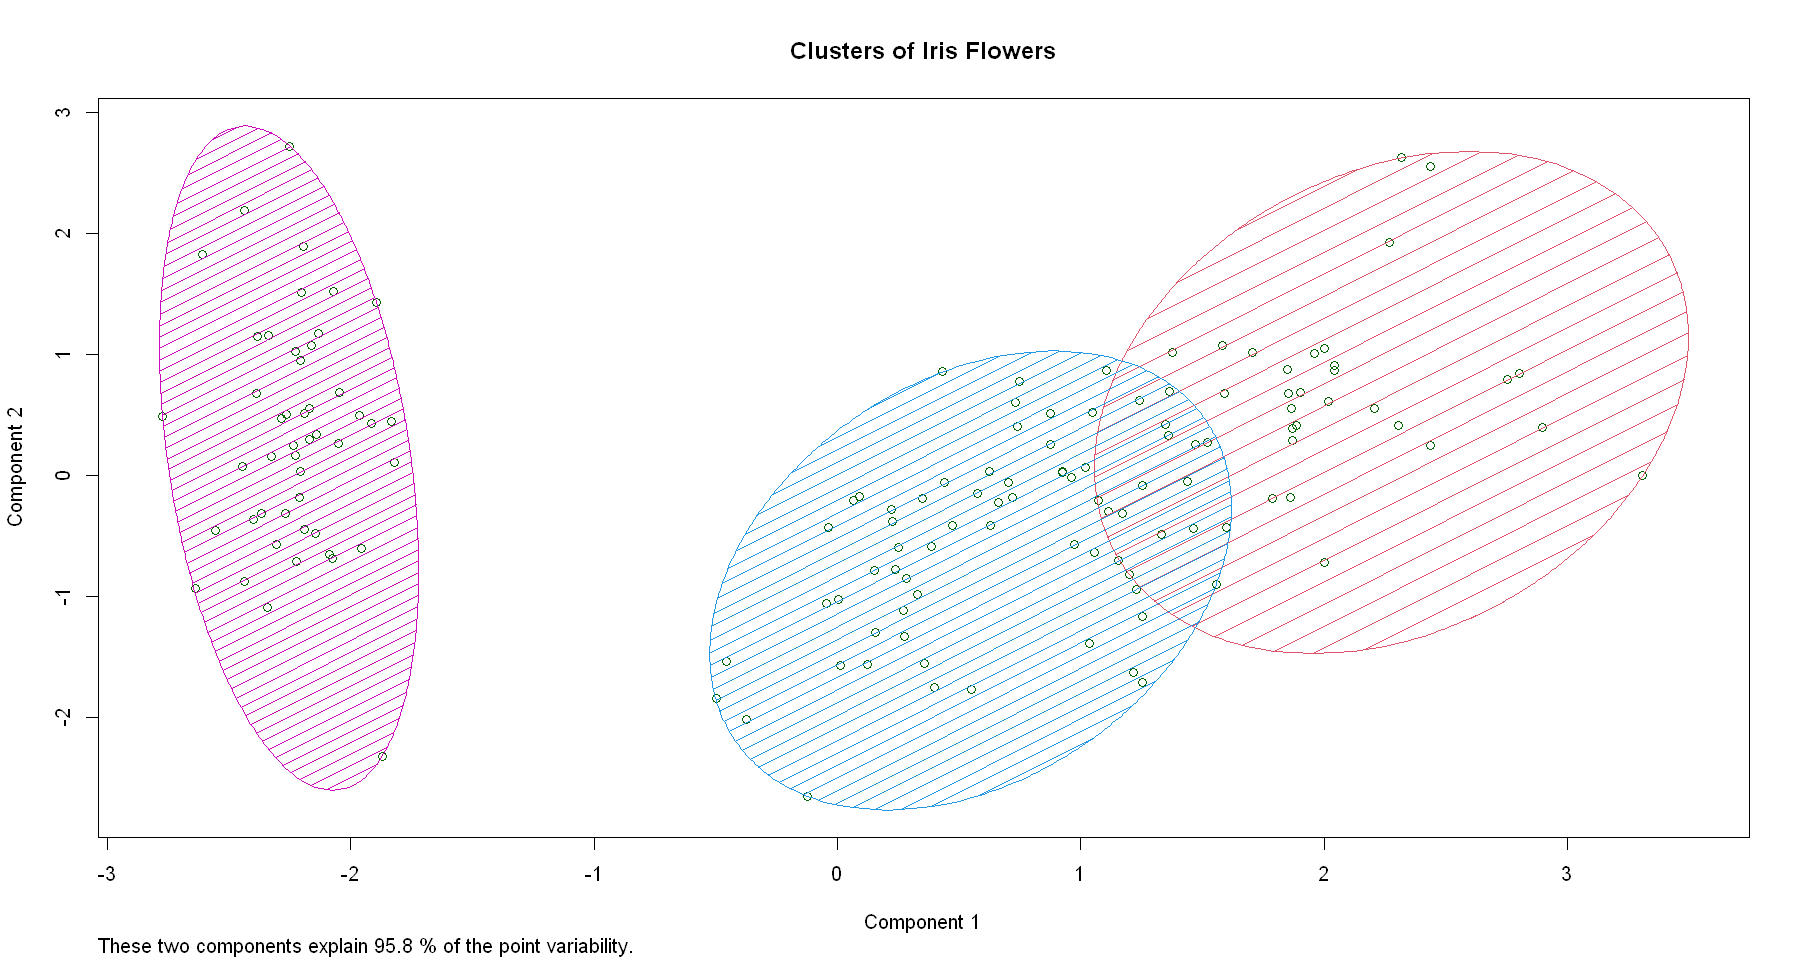

In [13]:
clusplot(iris[,2:5],
         KM$cluster,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 0,
         plotchar = FALSE,
         span = TRUE,
         main = paste("Clusters of Iris Flowers"))

From the Table [(50 + 48 + 36)/150] = 89.33% of the k-means cluster output matched with the actual Species clusters. versicolor(Cluster 2) & virginica(Cluster 3) have some overlapping features which is also apparent from the cluster visualizations. So, We can Conclude that our model has achieved 89.33% accuracy!

# Scatter plots (to view kmeans clusters)

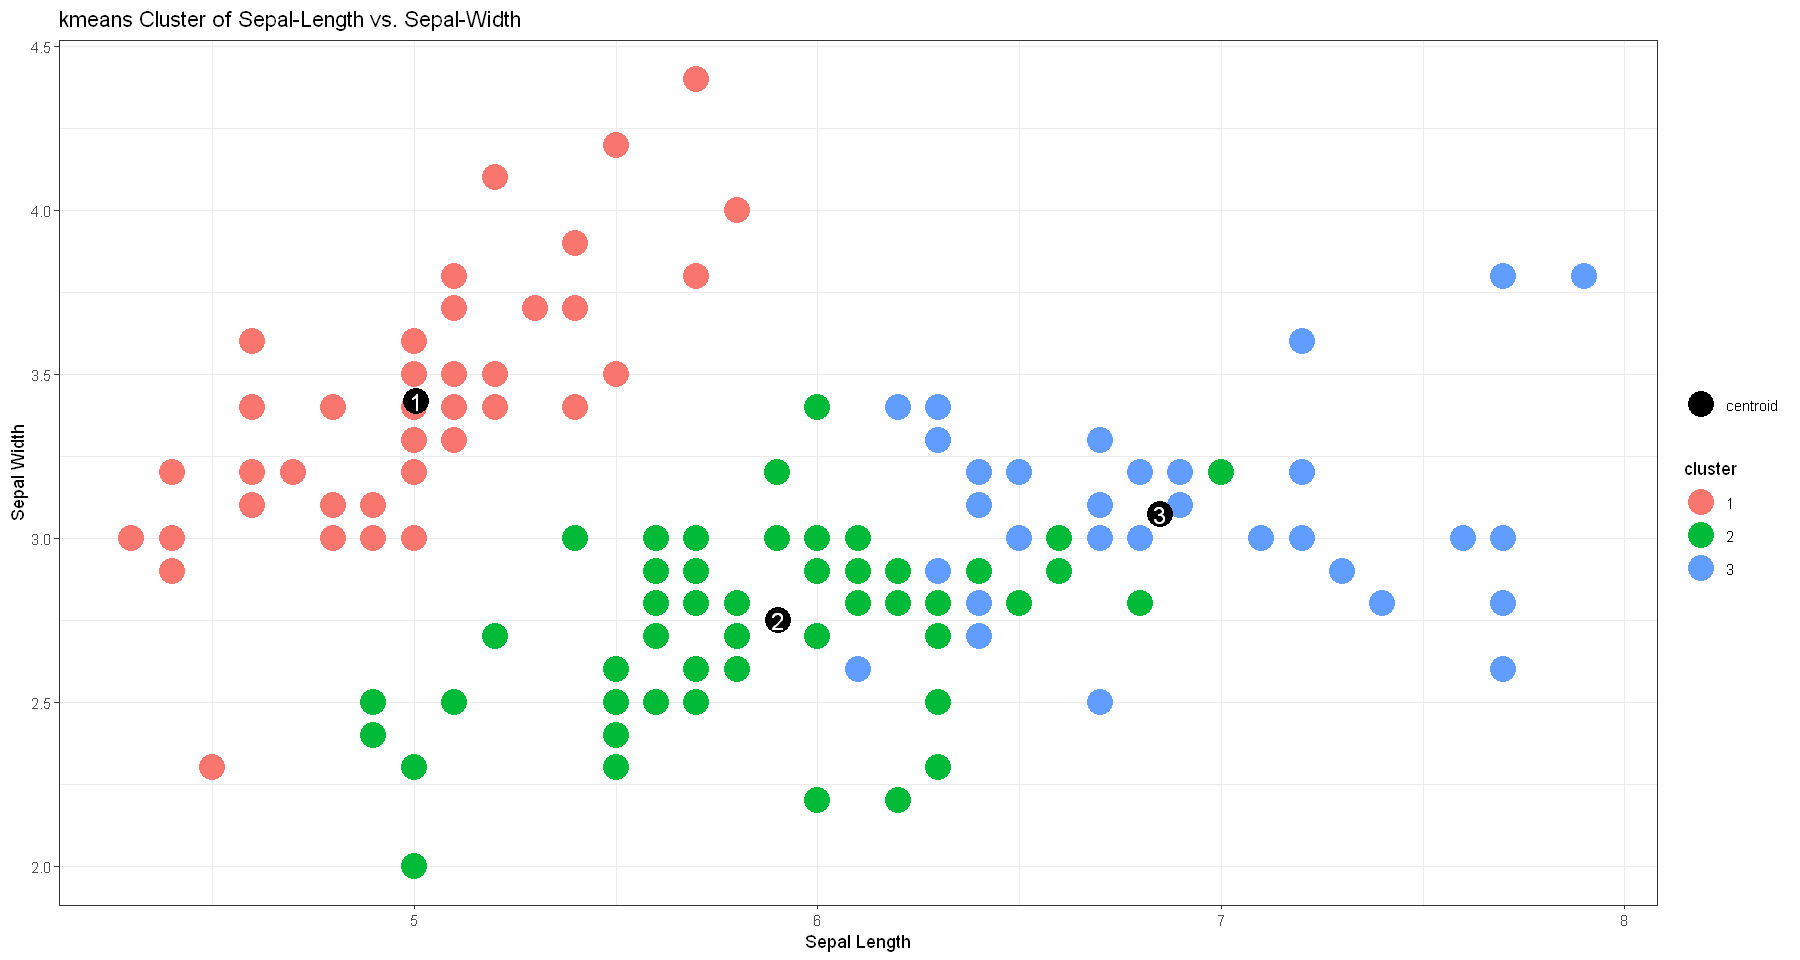

In [14]:
#Sepal-Length vs. Sepal-Width(kmeans cluster)

ggplot()+
  geom_point(data = iris_cluster, 
             mapping = aes(x = SepalLengthCm, 
                                  y = SepalWidthCm, 
                                  colour = cluster,fill='black'),size = 7) +
  geom_point(mapping = aes_string(x = KM$centers[, "SepalLengthCm"], 
                                  y = KM$centers[, "SepalWidthCm"]),
                                  color = "black", size = 7) +
  geom_text(mapping = aes_string(x = KM$centers[, "SepalLengthCm"], 
                                  y = KM$centers[, "SepalWidthCm"],
                                 label = 1:3),
                                  color = "white", size =5) +
  labs(x = 'Sepal Length', y = 'Sepal Width')+
  ggtitle("kmeans Cluster of Sepal-Length vs. Sepal-Width")+
scale_fill_identity(name = ' ', guide = 'legend',labels = c('centroid'))+  
theme_bw()

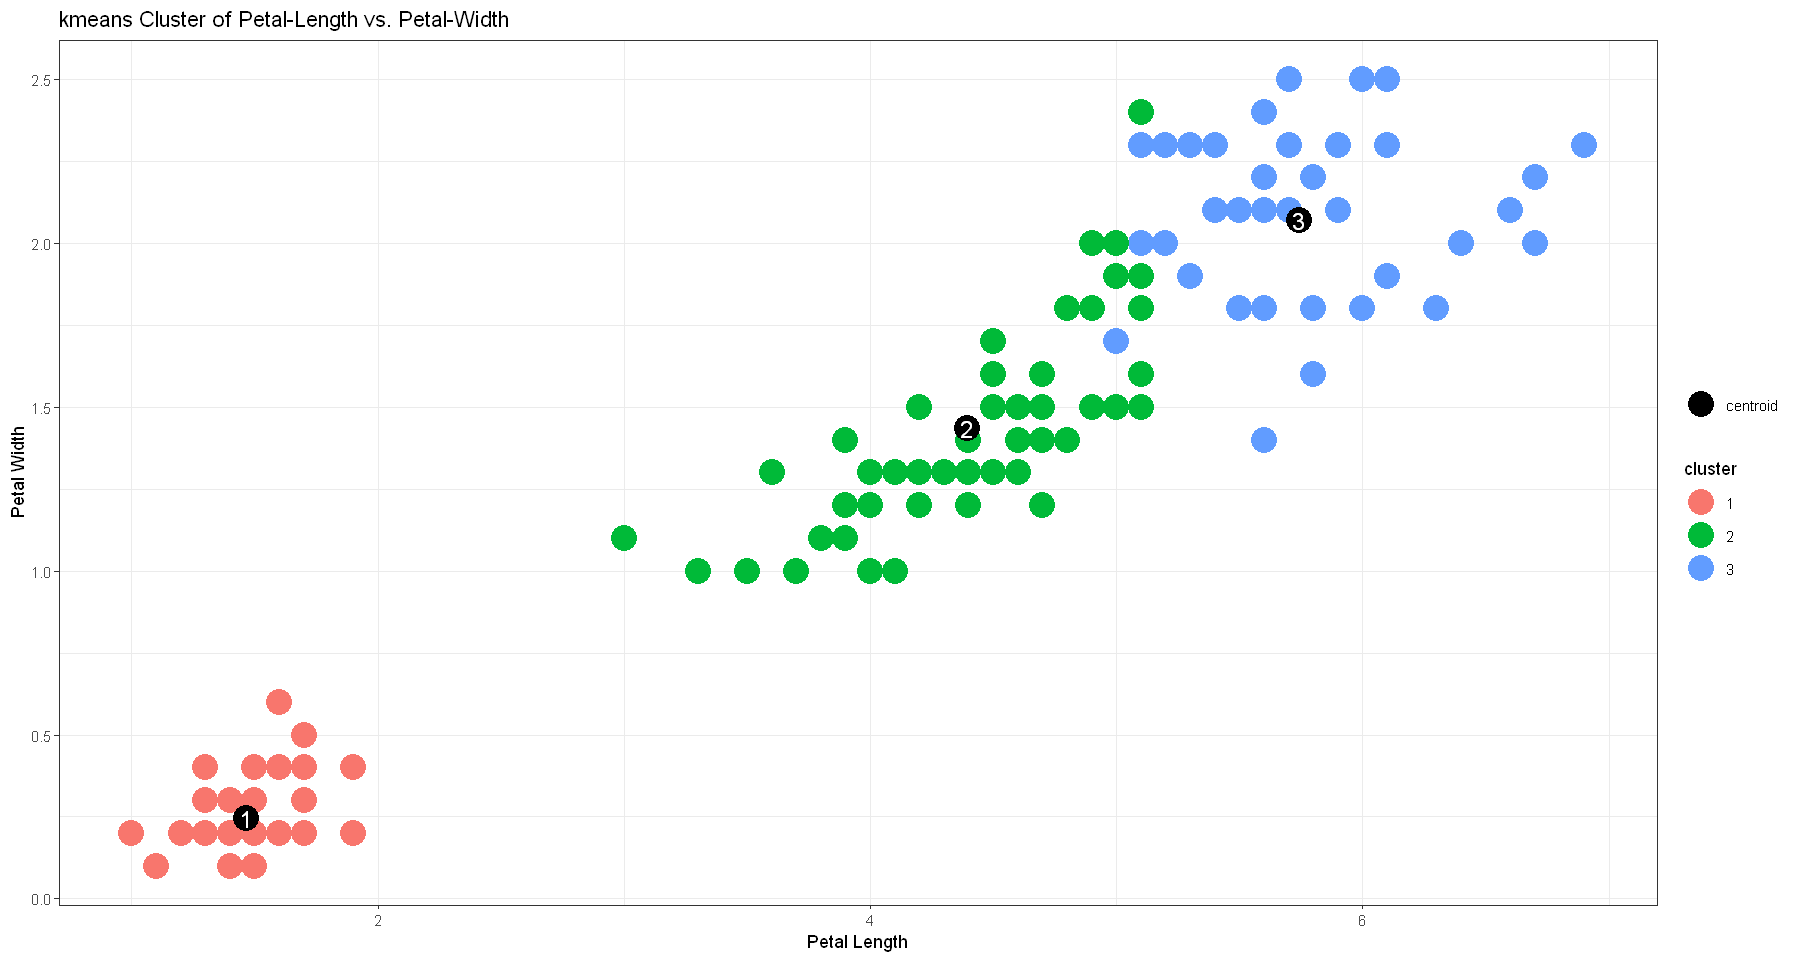

In [15]:
# Petal-Length vs. Petal-Width (kmeans cluster)
ggplot() +
  geom_point(data = iris_cluster, 
             mapping = aes(x = PetalLengthCm, 
                                  y = PetalWidthCm, 
                                  colour = cluster,fill='black'),size = 7) +
  geom_point(mapping = aes_string(x = KM$centers[, "PetalLengthCm"], 
                                  y = KM$centers[, "PetalWidthCm"]),
                                  color = "black", size = 7) +
  geom_text(mapping = aes_string(x = KM$centers[, "PetalLengthCm"], 
                                  y = KM$centers[, "PetalWidthCm"],
                                 label = 1:3),
                                  color = "white", size =5) +
  labs(x = 'Petal Length', y = 'Petal Width')+
  ggtitle("kmeans Cluster of Petal-Length vs. Petal-Width")+
  scale_fill_identity(name = ' ', guide = 'legend',labels = c('centroid'))+ 
  theme_bw()

# Thank You
- Manali Bhoir